In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/PK_eq.csv')

# Display the first few rows of the dataset
data.head()

# Get basic summary statistics
data.describe()

# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       4546 non-null   int64  
 1   Month      4546 non-null   int64  
 2   Day        4546 non-null   int64  
 3   Time       4546 non-null   object 
 4   Lat        4546 non-null   float64
 5   Lon        4546 non-null   float64
 6   Depth      4546 non-null   float64
 7   Mag        4546 non-null   float64
 8   Region     4546 non-null   object 
 9   Timestamp  4546 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 355.3+ KB


In [ ]:
# Check for missing values
data.isnull().sum()

Year         0
Month        0
Day          0
Time         0
Lat          0
Lon          0
Depth        0
Mag          0
Region       0
Timestamp    0
dtype: int64

In [ ]:
unique_regions = data['Region'].unique()
print(unique_regions)

['PAKISTAN' 'SOUTHWESTERN PAKISTAN' 'INDIA-PAKISTAN BORDER REGION'
 'OFF COAST OF PAKISTAN' 'SOUTHWESTERN KASHMIR' 'NORTHWESTERN KASHMIR'
 'EASTERN KASHMIR' 'KASHMIR-INDIA BORDER REGION']


In [ ]:
region_counts = data['Region'].value_counts()
print(region_counts)

PAKISTAN                        3863
SOUTHWESTERN PAKISTAN            181
SOUTHWESTERN KASHMIR             168
INDIA-PAKISTAN BORDER REGION     108
OFF COAST OF PAKISTAN             88
EASTERN KASHMIR                   68
NORTHWESTERN KASHMIR              50
KASHMIR-INDIA BORDER REGION       20
Name: Region, dtype: int64


In [ ]:
unique_years = data['Year'].unique()
print(unique_years)

[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981
 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970]


In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)

               Year     Month       Day       Lat       Lon     Depth  \
Year       1.000000  0.125021  0.007912  0.086860  0.067241 -0.233741   
Month      0.125021  1.000000 -0.040373  0.182329  0.144547 -0.129412   
Day        0.007912 -0.040373  1.000000 -0.121426 -0.127762  0.012045   
Lat        0.086860  0.182329 -0.121426  1.000000  0.880690 -0.042230   
Lon        0.067241  0.144547 -0.127762  0.880690  1.000000 -0.055179   
Depth     -0.233741 -0.129412  0.012045 -0.042230 -0.055179  1.000000   
Mag       -0.243866 -0.020178 -0.000132 -0.237405 -0.283778  0.059590   
Timestamp  0.999573  0.153877  0.009087  0.091594  0.070923 -0.236570   

                Mag  Timestamp  
Year      -0.243866   0.999573  
Month     -0.020178   0.153877  
Day       -0.000132   0.009087  
Lat       -0.237405   0.091594  
Lon       -0.283778   0.070923  
Depth      0.059590  -0.236570  
Mag        1.000000  -0.243466  
Timestamp -0.243466   1.000000  


<ipython-input-209-e02734b85495>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


## Here's the interpretation of correlation matrix:
# Year:
Since Year has a strong positive correlation of approximately 0.999573 with Timestamp, it reflects the year component of the Timestamp. This correlation is expected since you extracted the "Year" from the "Timestamp" column. However, Year has a very weak or no meaningful correlation with other variables (ranging from -0.243866 to 0.086860). This is because Year does not exhibit strong linear relationships with other variables, making its correlations with them not very meaningful.
# Month:
Month has a weak positive correlation with Latitude (Lat) (0.182329) and Longitude (Lon) (0.144547). This suggests a slight positive correlation between the month and the earthquake's location. It implies that the latitude and longitude of earthquake occurrences tend to slightly vary with the month of the year.
# Day:
Day does not exhibit a strong correlation with any of the other variables (correlation coefficients ranging from -0.127762 to 0.012045). This suggests that there is no significant linear relationship between the day of the month and the other variables in the dataset.
# Lat (Latitude):
Latitude (Lat) has a strong positive correlation (approximately 0.880690) with Longitude (Lon), indicating that earthquakes with higher latitudes tend to have higher longitudes. Additionally, there is a weak negative correlation of -0.237405 with Magnitude (Mag), suggesting that earthquakes with higher latitudes may have slightly smaller magnitudes.
# Lon (Longitude):
Longitude (Lon) shows a strong positive correlation (approximately 0.880690) with Latitude (Lat) and a weak negative correlation of -0.283778 with Magnitude (Mag). This implies that earthquakes with higher longitudes tend to have higher latitudes, and there may be a slight tendency for earthquakes with higher longitudes to have smaller magnitudes.
# Depth:
Depth exhibits a weak positive correlation (0.059590) with Magnitude (Mag), suggesting that deeper earthquakes may have slightly higher magnitudes. However, this correlation is relatively weak, indicating that there may be other factors influencing earthquake magnitude.
# Mag (Magnitude):
Magnitude (Mag) has a weak negative correlation with Latitude (Lat) (-0.237405) and Longitude (Lon) (-0.283778), implying that earthquakes with higher magnitudes tend to occur at lower latitudes and longitudes.

1. Histogram of Earthquake Magnitudes:



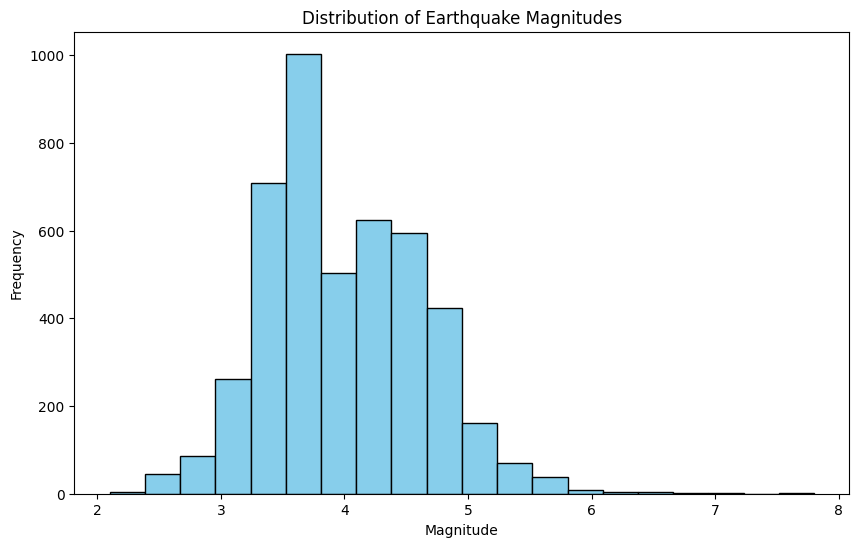

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Mag'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter Plot of Earthquake Latitude vs. Longitude:


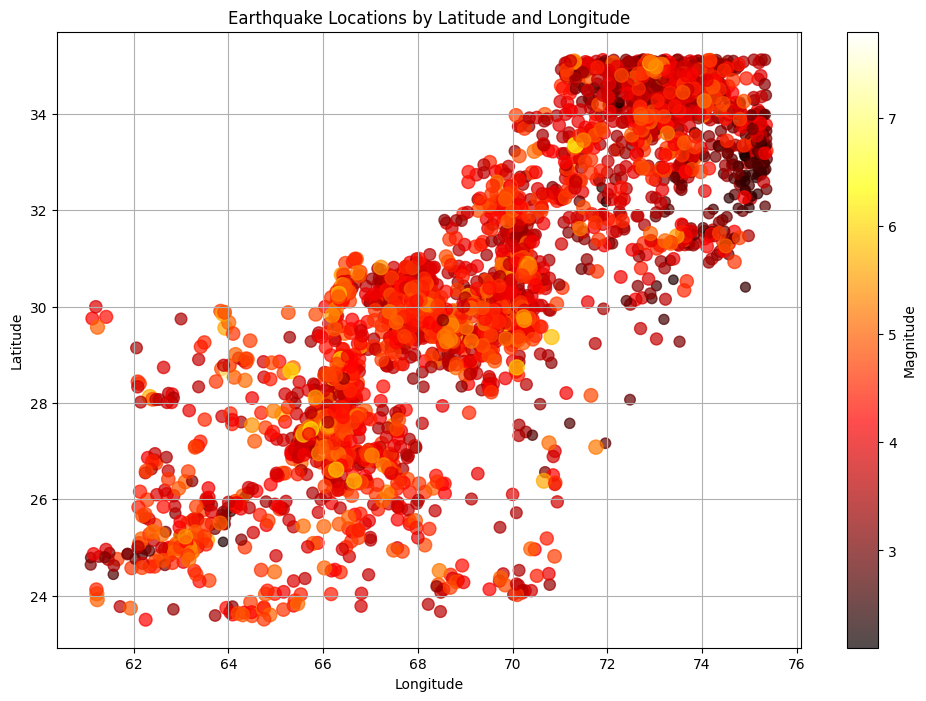

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(data['Lon'], data['Lat'], c=data['Mag'], cmap='hot', s=data['Mag']*20, alpha=0.7)
plt.title('Earthquake Locations by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Magnitude')
plt.grid(True)  # Add grid lines for better reference
plt.show()

## 3. Line graph of Earthquake Occurrences through the years:



In [ ]:
unique_years = data['Year'].unique()
print(unique_years)

[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981
 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970]


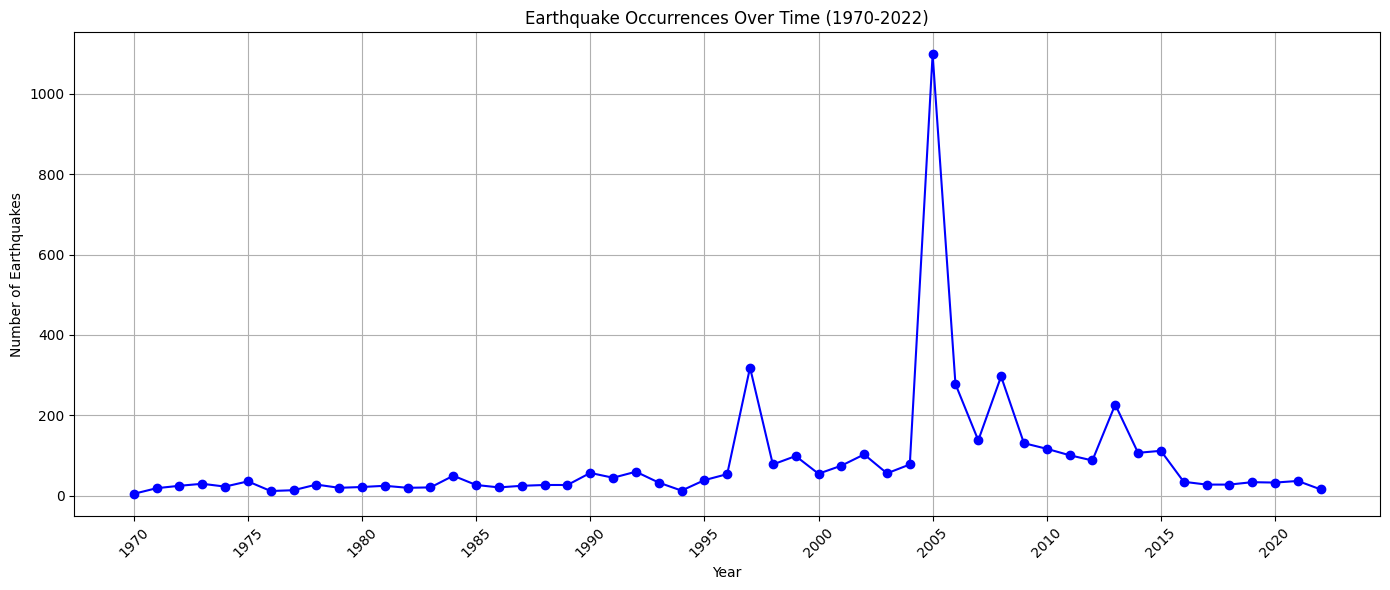

In [ ]:
# Create a line graph with fewer data points (e.g., one point per year)
yearly_counts = data['Year'].value_counts().sort_index().reset_index()
yearly_counts.columns = ['Year', 'Counts']
# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the data
ax.plot(yearly_counts['Year'], yearly_counts['Counts'], marker='o', linestyle='-', color='b')
ax.set_title('Earthquake Occurrences Over Time (1970-2022)')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquakes')
ax.grid(True)  # Add grid lines for reference

# Customize the x-axis to display selected years (e.g., every 5 years)
selected_years = range(1970, 2023, 5)
ax.set_xticks(selected_years)
ax.set_xticklabels(selected_years, rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
unique_years = data['Year'].unique()
print(unique_years)

[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995
 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981
 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970]


## **QUESTION 01 Seasonal Earthquake Patterns:**
To identify recurring seasonal patterns in earthquakes and determine when activity tends to be higher, WE can create a heatmap of earthquake occurrences by month:


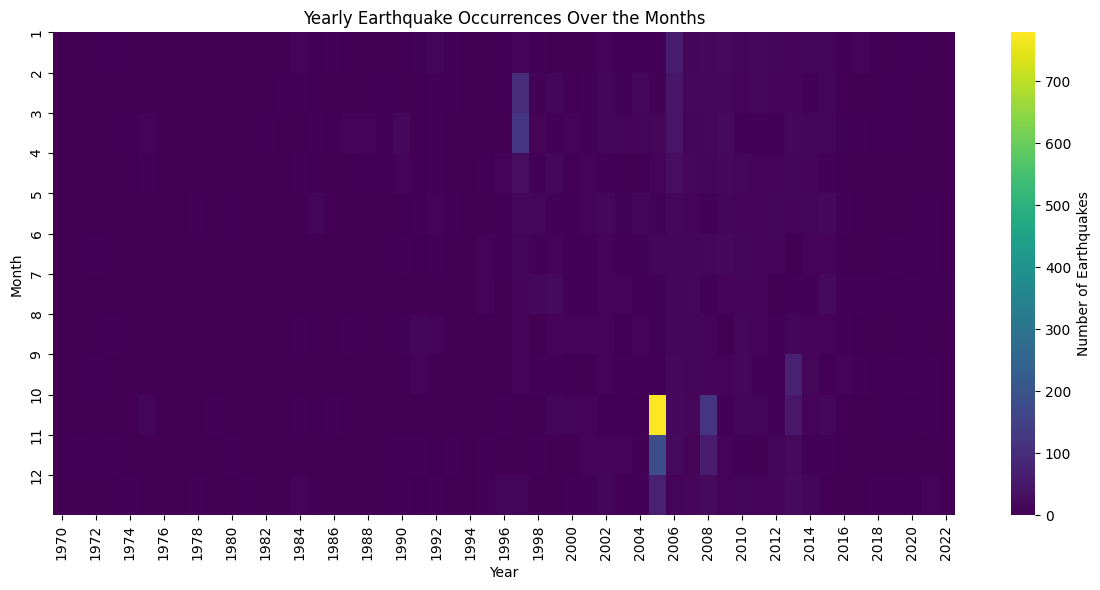

In [ ]:
# Create a pivot table to count earthquakes by month and year
yearly_counts = data.pivot_table(index='Month', columns='Year', values=None, aggfunc='size', fill_value=0)

# Create the heatmap without displaying counts
plt.figure(figsize=(12, 6))
sns.heatmap(yearly_counts, cmap='viridis', cbar_kws={'label': 'Number of Earthquakes'}, annot=False)
plt.title('Yearly Earthquake Occurrences Over the Months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(range(12), range(1, 13))  # Set y-axis ticks to display months 1-12
plt.tight_layout()
plt.show()


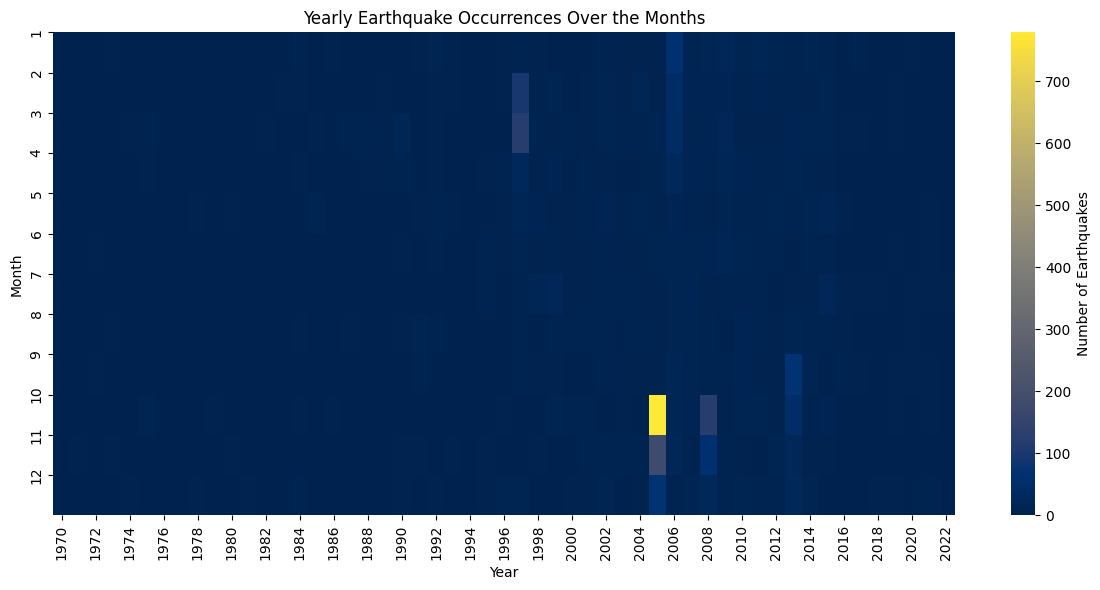

In [ ]:
# Create a pivot table to count earthquakes by month and year
yearly_counts = data.pivot_table(index='Month', columns='Year', values=None, aggfunc='size', fill_value=0)

# Create the heatmap without displaying counts
plt.figure(figsize=(12, 6))
sns.heatmap(yearly_counts, cmap='cividis', cbar_kws={'label': 'Number of Earthquakes'}, annot=False)
plt.title('Yearly Earthquake Occurrences Over the Months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(range(12), range(1, 13))  # Set y-axis ticks to display months 1-12
plt.tight_layout()
plt.show()


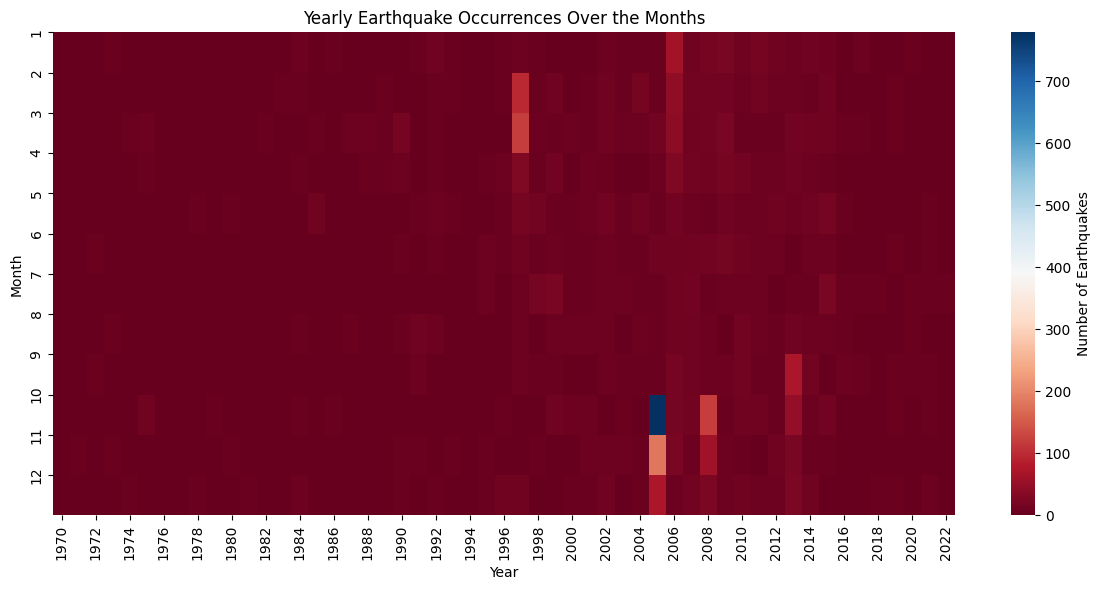

In [ ]:
# Create a pivot table to count earthquakes by month and year
yearly_counts = data.pivot_table(index='Month', columns='Year', values=None, aggfunc='size', fill_value=0)

# Create the heatmap without displaying counts
plt.figure(figsize=(12, 6))
sns.heatmap(yearly_counts, cmap='RdBu', cbar_kws={'label': 'Number of Earthquakes'}, annot=False)
plt.title('Yearly Earthquake Occurrences Over the Months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(range(12), range(1, 13))  # Set y-axis ticks to display months 1-12
plt.tight_layout()
plt.show()


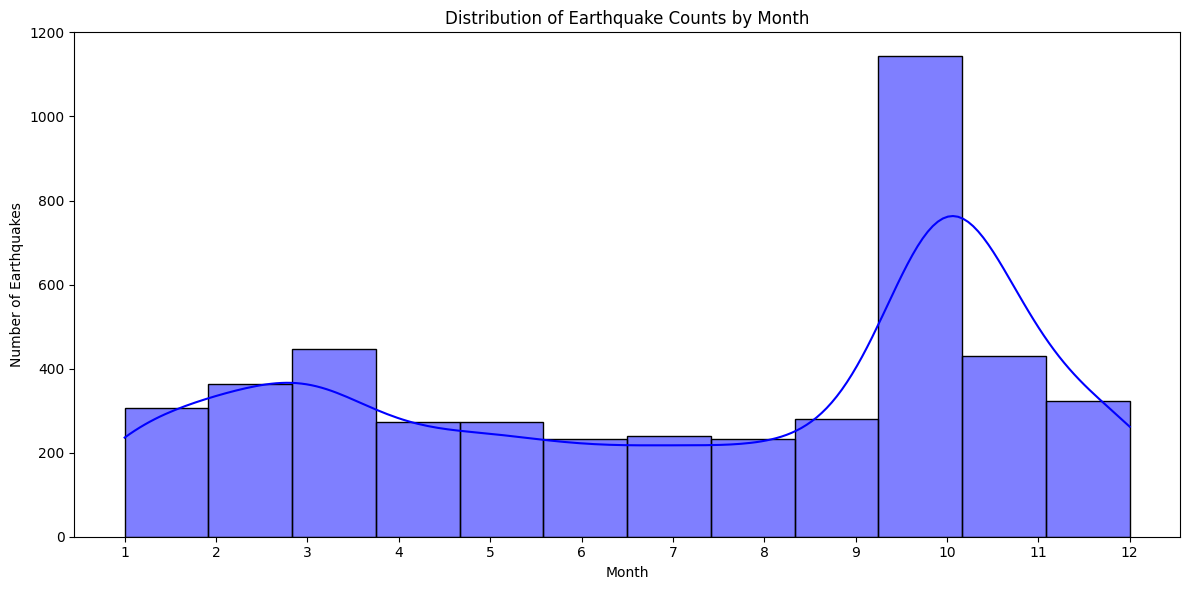

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Month', bins=12, kde=True, color='blue')
plt.title('Distribution of Earthquake Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

## **QUESTION 02 Time of Day Patterns:**
Are there certain times of the day when earthquakes are more likely to occur? We can create a bar chart or heatmap showing the time distribution of earthquakes.

In [ ]:
data.head()

,Year,Month,Day,Time,Lat,Lon,Depth,Mag,Region,Timestamp
0,2022,4,11,1:41:41,33.2832,70.5607,41.2,4.8,PAKISTAN,1649641301
1,2022,3,18,2:54:11,30.1460,72.5955,15.3,4.2,PAKISTAN,1647572051
2,2022,7,31,13:42:13,25.1527,63.5489,10.0,5.6,SOUTHWESTERN PAKISTAN,1659274933
3,2022,5,6,6:21:18,26.9542,66.2725,10.0,5.2,PAKISTAN,1651818078
4,2022,7,31,13:52:16,25.1473,63.4376,10.0,5.1,SOUTHWESTERN PAKISTAN,1659275536


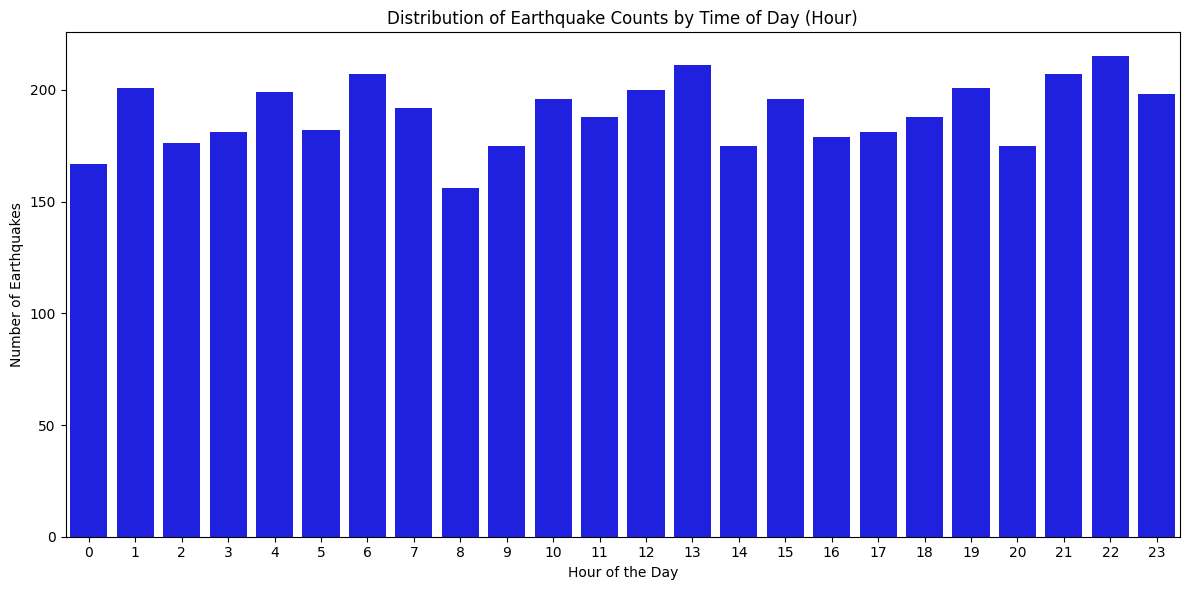

In [ ]:
# Extract the hour from the 'Time' column
data['Hour'] = data['Time'].str.split(':').str[0].astype(int)

# Calculate the counts of earthquakes by hour
hourly_counts = data['Hour'].value_counts().sort_index().reset_index()
hourly_counts.columns = ['Hour', 'Counts']

# Create a bar chart to show the distribution of earthquakes by hour
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_counts, x='Hour', y='Counts', color='blue')
plt.title('Distribution of Earthquake Counts by Time of Day (Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Earthquakes')
plt.tight_layout()
plt.show()

## QUESTION 03 Predictive Analysis:
Short-term Earthquake Forecasting:
Building a predictive model that forecasts the likelihood of earthquakes in the coming months based on historical temporal patterns and relevant features


In [ ]:
# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

In [ ]:
# Set 'Timestamp' as the index
data.set_index('Timestamp', inplace=True)

In [ ]:
# Extract the relevant columns for forecasting (e.g., 'Mag' or 'Depth')
time_series_data = data['Mag']  # You can replace 'Mag' with any other relevant feature

# Resample the data to a regular frequency (e.g., daily)
time_series_data = time_series_data.resample('D').mean()  # Adjust the frequency as needed


In [ ]:
# Fill missing values if any
time_series_data.fillna(0, inplace=True)  # You can choose how to handle missing values
